## Loading image

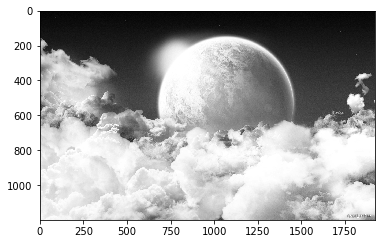

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("a.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap="gray")
img_flat=img.flatten() #to remove all the rows and column

## Histogram Streching
# $$ pixel= \frac{(pixel-min)(L-1)}{max-min} $$ 
### L-1 = Max value a pixle can take 
Contrast is a measure of the “range” of an image; i.e. how spread its intensities are.<br>
Histogram streching tries to increase the Contrast of a image

255 90


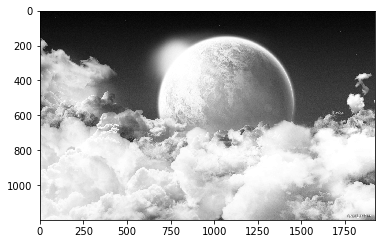

In [26]:

#print(img_flat)
max_pixel=max(img_flat)
min_pixel=min(img_flat)
print(max_pixel,min_pixel)
imgHS=cv2.imread("a.jpg")
imgHS=cv2.cvtColor(imgHS,cv2.COLOR_BGR2GRAY)
for i in range(len(imgHS)):
    for k in range(len(imgHS[i])):
        pixel=imgHS[i][k]
        pixel=  ( (pixel-min_pixel) / (max_pixel-min_pixel) ) * (2**8-1)
        #print(pixel) 
        imgHS[i][k]=int(pixel)
plt.imshow(imgHS,cmap="gray")     

## Histogram Equalization 

# $$ Pixle= (L-1) \sum_{n=0}^{upto\_that\_pixle} P(Pixle)  $$
### P(Pixle) = Probablity of pixle occuring 
### L-1 = Max value a pixle can take 


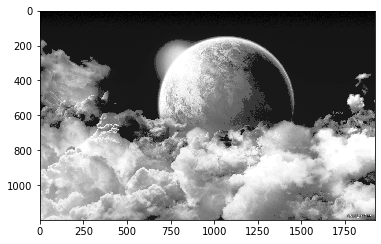

In [27]:
dict_pixel={}
for i in img_flat:
    dict_pixel[i]=dict_pixel.get(i,0)+1
total=sum(dict_pixel.values())
probablity_pixel={}
for i in dict_pixel.keys():
    probablity_pixel[i]=dict_pixel[i]/total

imgHE=cv2.imread("a.jpg")
imgHE=cv2.cvtColor(imgHE,cv2.COLOR_BGR2GRAY)
for i in range(len(imgHE)):
    for k in range(len(imgHE[i])):
        pixel=imgHE[i][k]
        sum_prob=0
        for m in probablity_pixel.keys():
            if(m>pixel):
                break
            sum_prob=probablity_pixel[m]+sum_prob
        pixel= 255  * sum_prob
        #print(pixel) 
        imgHE[i][k]=int(pixel)
plt.imshow(imgHE,cmap="gray")     

## Negative Image
# $$ pixel= L-1 - pixel $$
### L-1 = Max value a pixle can take 
It can be termed as compliment of image<br>
Can be used to enhance white or gray details embedded in dark regions especially when the black areas are dominant in size

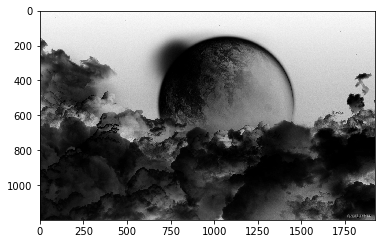

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("a.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgN=img
for i in range(len(imgN)):
    for k in range(len(imgN[i])):
        pixel=imgN[i][k]
        pixel=  (2**8 - 1)-pixel
        #print(pixel) 
        imgN[i][k]=int(pixel)
plt.imshow(imgN,cmap="gray")

# Log transform
# $$pixel=c * log(1+pixel)$$
### c = constant
If pixel values are near then it can help in widening their gap.<br>
If pixel values are far then it can help in shortening their gap.<br>
### page 12 of https://www.slideshare.net/kingyahya/4intensity-transformations

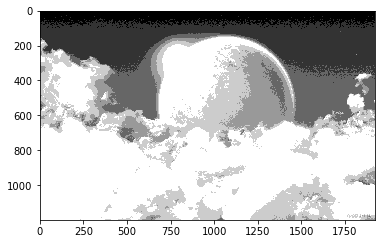

In [29]:

img=cv2.imread("a.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgL=img
for i in range(len(imgL)):
    for k in range(len(imgL[i])):
        pixel=imgL[i][k]
        c=5
        pixel= c*np.log(pixel+1)
        #print(pixel) 
        imgL[i][k]=int(pixel)
plt.imshow(imgL,cmap="gray")

## Gamma (Power) Transform
# $$ pixel = c * (pixel)^{γ} $$
### c,γ = Constant
Similar function as log

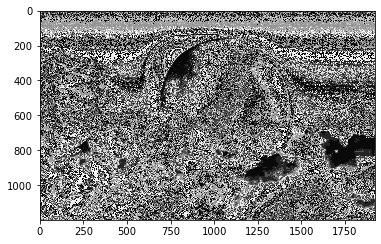

In [30]:
img=cv2.imread("a.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgG=img
for i in range(len(imgG)):
    for k in range(len(imgG[i])):
        pixel=imgG[i][k]
        c=9
        gamma=2
        pixel= c*(pixel**gamma)
        #print(pixel) 
        imgG[i][k]=int(pixel)
plt.imshow(imgG,cmap="gray")

# Spacial Filtering
These Filters apply changes to orignal image over a specific area (Mask) <br>
### let m = no of columns in mask <br>
### let n = no of rows in mask <br>
### m-1 columns are added at left and right of the orignal image <br>
### n-1 columns are added at top and down of the orignal image <br>
## Correlation Filtering
No change in mask
## Convolution Filters
Mask is Flipped horizontaly and vertically

<img src="a.jpg" alt="Drawing" style="width: 200px;"/>